<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
تحلیل زمانی
</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
در آخرین گام از پروژه، گزارشی جامع در مورد ویژگی‌های هر منطقه به‌دست می‌آوریم. همچنین با استفاده از زمان انجام معاملات، دو تحلیل بر روی سری‌های زمانی انجام می‌دهیم.
</font> 
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
مجموعه‌داده
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
ابتدا فایل <code>housing_extended.csv</code> را که در گام‌های قبلی پروژه به‌دست آمد می‌خوانیم.
</font>
</p>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

housing_extended = pd.read_csv('housing_extended.csv', encoding='gbk')

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
قسمت اول
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
در قسمت اول می‌خواهیم به ازای هر منطقه (<code>district</code>) اطلاعاتی را به‌دست آوریم.
دیتافریمی به نام <code>districts_df</code> بسازید و <code>index</code> آن را برابر ستون <code>district</code> قرار دهید. سپس برای هر منطقه موارد زیر را حساب کنید:
</font>
</p>

<center>
<div dir=rtl style="direction: rtl;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>

| نام ستون | توضیح مقدار |
| :---: | :---: |
| <code dir=ltr>pricePerSquare mean</code> | متوسط قیمت هر متر مربع |
| <code dir=ltr>% houses with elevator</code> | درصد خانه‌هایی که آسانسور دارند |
| <code dir=ltr>% houses with subway</code> | درصد خانه‌هایی که به مترو دسترسی دارند |
| <code dir=ltr>square mean</code> | متوسط متراژ خانه‌ها |
| <code dir=ltr>building age mean</code> | متوسط سال عمر خانه‌ها (عمر هر خانه تا سال ۲۰۲۱ محاسبه می‌شود.) |
| <code dir=ltr>frequent buildingStructure</code> | رایج‌ترین نوع ساختمان |

</font>
</div>
</center>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
دیتافریم شما شامل ۱۳ ردیف (منطقه) خواهد بود و ردیف اول آن باید به شکل زیر باشد. توجه کنید که ردیف‌های دیتافریم باید براساس شماره‌ی منطقه مرتب باشند.
</font>
</p>

<center>
<div dir=ltr style="direction: ltr;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>


|   <code>district</code> |   <code dir=ltr>pricePerSquare mean</code> |   <code dir=ltr>% houses with elevator</code> |   <code dir=ltr>% houses with subway</code> |   <code dir=ltr>square mean</code> |   <code dir=ltr>building age mean</code> | <code dir=ltr>frequent buildingStructure</code>   |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|          1 |               5981.774965 |                  56.216550	 |                93.488404 |       67.047856	 |             25.151709 | steel-concrete composite     |

</font>
</div>
</center>

In [2]:
import numpy as np
districts = housing_extended.district.unique()
districts_df = pd.DataFrame(data=np.sort(districts), columns=['district'])
districts_df

,district
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [3]:
districts_df['pricePerSquare mean'] = housing_extended.groupby(by='district',axis=0)['pricePerSquare'].mean().values
districts_df['% houses with elevator'] = housing_extended.groupby(by='district',axis=0)['elevator'].apply(lambda x: (x[x == 'has elevator'].count()/x.count()) * 100).values
districts_df['% houses with subway'] = housing_extended.groupby(by='district',axis=0)['subway'].apply(lambda x: (x[x == 'has subway'].count()/x.count()) * 100).values
districts_df['square mean'] = housing_extended.groupby(by='district',axis=0)['square'].mean().values
districts_df['building age mean'] = 2021 - housing_extended.groupby(by='district',axis=0)['constructionTime'].mean().values
districts_df['frequent buildingStructure'] = housing_extended.groupby(by='district',axis=0)['buildingStructure'].agg(lambda x : x.value_counts().idxmax()).values
districts_df

C:\Users\helli\AppData\Local\Temp\ipykernel_10552\3560042937.py:1: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  districts_df['pricePerSquare mean'] = housing_extended.groupby(by='district',axis=0)['pricePerSquare'].mean().values
C:\Users\helli\AppData\Local\Temp\ipykernel_10552\3560042937.py:2: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  districts_df['% houses with elevator'] = housing_extended.groupby(by='district',axis=0)['elevator'].apply(lambda x: (x[x == 'has elevator'].count()/x.count()) * 100).values
C:\Users\helli\AppData\Local\Temp\ipykernel_10552\3560042937.py:3: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  districts_df['% houses with subway'] = housing_extended.groupby(by='district',axis=0)['subway'].apply(lambda x: (x[x == 'has subway'].count()/x.count()) * 100).values
C:\Use

,district,pricePerSquare mean,% houses with elevator,% houses with subway,square mean,building age mean,frequent buildingStructure
0,1,5981.774965,56.216550,93.488404,67.047856,25.151709,steel-concrete composite
1,2,3805.924811,68.647623,61.825544,76.951352,20.639123,steel-concrete composite
2,3,3130.333142,66.636691,47.032374,92.071484,15.494604,steel-concrete composite
3,4,2999.928821,39.983398,43.027117,86.322272,18.324364,mixed
4,5,2841.761483,80.077031,39.005602,89.297990,11.271359,steel-concrete composite
5,6,2952.222451,37.892663,43.553669,100.121614,17.536464,mixed
6,7,4225.965657,66.746216,68.307898,78.845544,22.553717,steel-concrete composite
7,8,5312.914827,51.883462,61.087404,73.615248,24.191570,steel-concrete composite
8,9,3491.126972,46.534461,27.636823,73.047513,25.653835,steel-concrete composite
9,10,6464.899480,48.030692,76.322951,62.386157,28.349599,mixed


In [4]:
districts_df.set_index('district', inplace=True)
districts_df

,pricePerSquare mean,% houses with elevator,% houses with subway,square mean,building age mean,frequent buildingStructure
district,,,,,,
1,5981.774965,56.216550,93.488404,67.047856,25.151709,steel-concrete composite
2,3805.924811,68.647623,61.825544,76.951352,20.639123,steel-concrete composite
3,3130.333142,66.636691,47.032374,92.071484,15.494604,steel-concrete composite
4,2999.928821,39.983398,43.027117,86.322272,18.324364,mixed
5,2841.761483,80.077031,39.005602,89.297990,11.271359,steel-concrete composite
6,2952.222451,37.892663,43.553669,100.121614,17.536464,mixed
7,4225.965657,66.746216,68.307898,78.845544,22.553717,steel-concrete composite
8,5312.914827,51.883462,61.087404,73.615248,24.191570,steel-concrete composite
9,3491.126972,46.534461,27.636823,73.047513,25.653835,steel-concrete composite


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
تحلیل داده‌ها بر اساس ترتیب زمانی آن‌ها در برخی حوزه‌ها کاربرد بسیاری دارد. به‌عنوان مثال، پیش‌بینی قیمت در بورس، پیش‌بینی قیمت طلا، بررسی حجم فروش اجناس در بازه‌های زمانی مختلف و غیره. زمان انجام معاملات هر خانه در این دیتافریم مشخص شده است و ما می‌توانیم چنین تحلیل‌هایی را نیز بر روی آن انجام دهیم.
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
اولین کاری که باید انجام دهیم، تبدیل ستون <code>tradeTime</code> به فرمت زمانی است. برای این‌کار از تابع <code>to_datetime</code> استفاده می‌کنیم.
</font>
</p>

In [5]:
housing_extended['tradeTime'] = pd.to_datetime(housing_extended['tradeTime'])
housing_extended.head()

,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district,distanceToCapital,pricePerSquare
0,116.475489,40.019520,2016-08-09,1464.0,415.0,131.00,2,1,1,1,26,2005,Simplicity,steel-concrete composite,0.217,has elevator,has subway,7,14.074996,3167.938931
1,116.453917,39.881534,2016-07-28,903.0,575.0,132.38,2,2,1,2,22,2004,hardcover,steel-concrete composite,0.667,has elevator,no subway,7,4.701224,4343.556428
2,116.438010,40.076114,2016-09-30,965.0,297.5,134.00,3,1,1,1,21,2008,other,steel-concrete composite,0.273,has elevator,no subway,6,19.293041,2220.149254
3,116.428392,39.886229,2016-08-28,927.0,392.0,81.00,2,1,1,1,6,1960,rough,mixed,0.333,no elevator,has subway,1,2.683335,4839.506173
4,116.466280,39.991363,2016-07-22,861.0,275.6,53.00,1,0,1,1,8,2005,Simplicity,steel-concrete composite,0.333,has elevator,no subway,7,10.914652,5200.000000


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
قسمت دوم
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
طبق نظر افراد محلی، چند ماه است که قیمت خانه در حال کاهش است و پیش‌بینی می‌شود این روند ادامه یابد. در این تمرین می‌خواهیم صحت این فرضیه را بررسی کنیم.
<ul dir=rtl>
  <li>متد <code>resample</code> متدی قدرتمند برای کار با سری‌های زمانی است. با این متد می‌توان سطرها را بر اساس بازه‌ی زمانی گروه‌بندی کرد. پارامتر <code>rule</code> بازه‌ی مورد نظر و پارامتر <code>on</code> ستونی که زمان در آن ذخیره شده را مشخص می‌کند.</li>
    <li>یک عکس شامل یک صفحه‌محور بسازید و اندازه‌ی طول و عرض آن را برابر <code>8</code> اینچ قرار دهید.</li>
  <li>با استفاده از متد <code>resample</code> میانگین قیمت هر متر مربع در معاملات ماهانه را حساب کنید. قبل از سال ۲۰۱۰ زیر ۱۰ معامله انجام شده است. معاملات بزرگتر یا مساوی سال ۲۰۱۰ را وارد محاسبات خود کنید.
</li>
  <li>
با استفاده از رابط پانداز، اطلاعات به‌دست آمده را روی صفحه‌محوری که پیش از این ساختید رسم کنید. رنگ خط را برابر <code>crimson</code> قرار دهید.
</li>

<li>
تنظیمات را طوری تغییر دهید که نمودار خروجی شما دقیقاً مانند شکل زیر شود.
</li>

</ul>
</font>
</p>


<p style="text-align:center; background-color:white"><img src="fig1.png"></p>



C:\Users\helli\AppData\Local\Temp\ipykernel_10552\2357512328.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  housing_extended.loc[housing_extended.tradeTime >= '2010'].resample(rule='M', on='tradeTime')['pricePerSquare'].mean().plot(ax=ax1, color = 'crimson')


Text(0, 0.5, 'pricePerSquare')

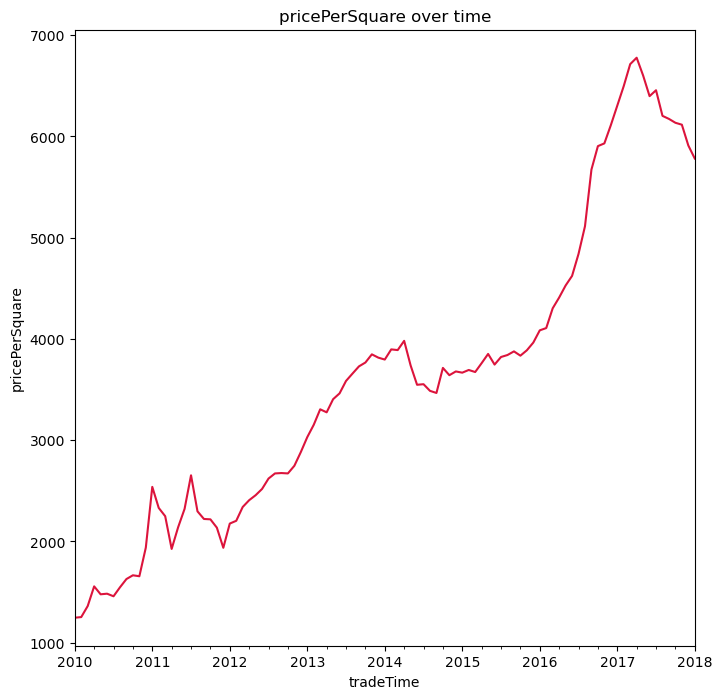

In [6]:
fig1 , ax1 = plt.subplots()
fig1.set_size_inches(8,8)

housing_extended.loc[housing_extended.tradeTime >= '2010'].resample(rule='M', on='tradeTime')['pricePerSquare'].mean().plot(ax=ax1, color = 'crimson')
ax1.set_title('pricePerSquare over time')
ax1.set_ylabel('pricePerSquare')

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
قسمت سوم
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
شایعه‌ی دیگری که می‌خواهیم بررسی کنیم، کاهش <b> تعداد </b> معاملات خانه‌های نزدیک مرکز شهر است. این نمودار مانند نمودار قبلی است و این تغییرات را باید در آن ایجاد کنید.
<ul dir=rtl>

  <li>
بازه‌ی زمانی به جای ماه، ۳ ماه می‌باشد و علاوه بر اینکه فقط معاملات بعد از ۲۰۱۰ باید بررسی شوند، معاملات خانه‌هایی که فاصله آن‌ها از مرکز بیشتر یا مساوی ۱۵ کیلومتر است هم باید حذف شوند.
</li>
  <li>
رنگ خط را برابر <code>orange</code> قرار دهید.
</li>

<li>
تنظیمات را طوری تغییر دهید که نمودار خروجی شما دقیقاً مانند شکل زیر شود.
</li>

</ul>
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
 <span style="color:green"><b>نکته:</b></span>
    ابتدا معاملات بعد از ۲۰۱۰ را انتخاب کنید، سپس از <code>resample</code> استفاده کنید و در نهایت تعداد خانه‌هایی که فاصله‌ی آنها تا مرکز کمتر از ۱۵ کیلومتر است را بشمارید.
  </font>
</p>
<p style="text-align:center; background-color:white"><img src="fig2.png"></p>



C:\Users\helli\AppData\Local\Temp\ipykernel_10552\2619979667.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  housing_extended.loc[housing_extended.tradeTime >= '2010'].resample(rule='3M', on='tradeTime').distanceToCapital.apply(lambda x: x[x < 15].count()).plot(ax=ax2, color='orange')


Text(0, 0.5, 'frequency')

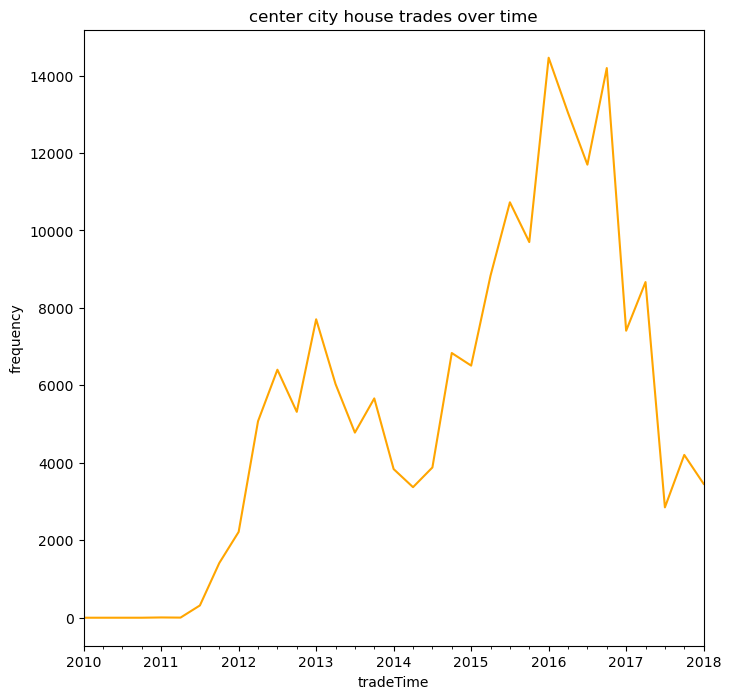

In [7]:
fig2 , ax2 = plt.subplots()
fig2.set_size_inches(8,8)

housing_extended.loc[housing_extended.tradeTime >= '2010'].resample(rule='3M', on='tradeTime').distanceToCapital.apply(lambda x: x[x < 15].count()).plot(ax=ax2, color='orange')
ax2.set_title('center city house trades over time')
ax2.set_ylabel('frequency')

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazirmatn" size=3>
    برای ساخته‌شدن فایل <code>result.zip</code> سلول زیر را اجرا کنید. توجه داشته باشید که پیش از اجرای سلول زیر تغییرات اعمال شده در نت‌بوک را ذخیره کرده باشید (<code>ctrl+s</code>) تا در صورت نیاز به پشتیبانی امکان بررسی کد شما وجود داشته باشد.
</font>
</p>

In [8]:

import zipfile
import joblib

districts_df.to_csv('districts_df.csv', index=True)
joblib.dump(fig1,"fig1")
joblib.dump(fig2,"fig2")

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)


file_names = ["districts_df.csv","fig1","fig2", '5_time_series.ipynb']
compress(file_names)

File Paths:
['districts_df.csv', 'fig1', 'fig2', '5_time_series.ipynb']
